<a href="https://colab.research.google.com/github/ashutoshsinha25/computer-vision/blob/main/kerasTuner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing necessary libraries 


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout , Flatten 
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# pre-requisite = python -- 3.5 and tensorflow -- 2.0+

print(tf.__version__)

2.9.2


In [3]:
# loading the data 

(X_train , y_train) , (X_test , y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


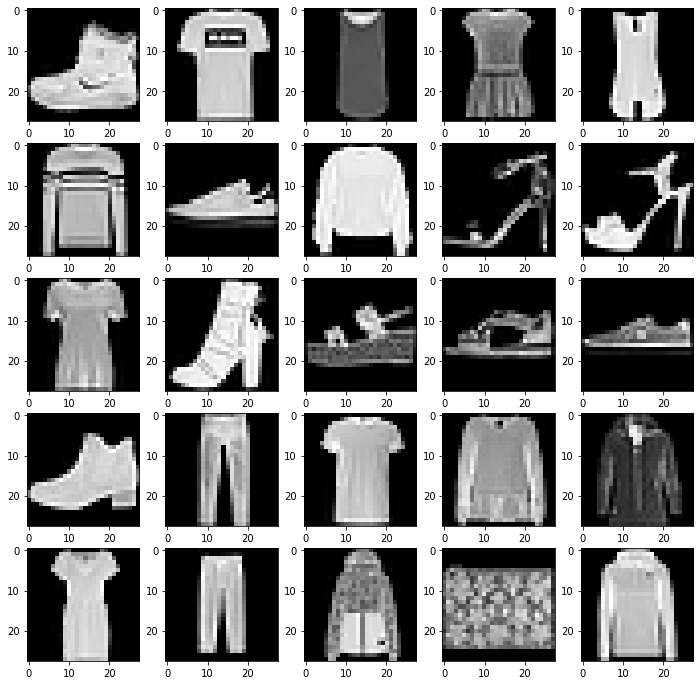

In [4]:
# visualizing the data 
plt.figure(figsize = (12 , 12))

for i in range(25):
  # define subplot 
  plt.subplot( 5 , 5 , i + 1)

  # plt pixel data 
  plt.imshow(X_train[i] , cmap = plt.get_cmap('gray'))

# show the figure 
plt.show()

In [5]:
# normalize the image 

X_train = X_train/255.
X_test = X_test/255.

In [6]:
# building the model 

model = Sequential([
    # flatten the images 
    Flatten(input_shape = (28 , 28)),
    # adding the first hidden layer
    Dense(256 , activation = 'relu'),
    # adding the second hidden layer
    Dense(128 , activation = 'relu'),
    # adding the third hidden layer
    Dense(64 , activation = 'relu'),
    # adding the output layer
    Dense(10 , activation = 'softmax')
])

In [7]:
# compile the model 

model.compile(loss = 'sparse_categorical_crossentropy' ,
              optimizer = 'adam' ,
              metrics = ['accuracy'])


In [8]:
# fitting the model 

model.fit(X_train , y_train , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4863 - accuracy: 0.8235
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3656 - accuracy: 0.8653
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - accuracy: 0.8787
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3060 - accuracy: 0.8874
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2910 - accuracy: 0.8908
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.8982
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2613 - accuracy: 0.9016
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.9049
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2404 - accuracy: 0.9078
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.233

In [9]:
# evaluate the model 

model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3941 - accuracy: 0.8846


[0.39406248927116394, 0.8845999836921692]

In [10]:
 '''
 Now lets tue the following things in the model : 
 

 1. number of hidden layers 
 2. number of neurons 
 3. learning rate 
 4. activation function
 '''

'\nNow lets tue the following things in the model : \n\n\n1. number of hidden layers \n2. number of neurons \n3. learning rate \n4. activation function\n'

In [11]:
# install keras tuner

!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 36.7 MB/s 
     |████████████████████████████████| 1.6 MB 32.6 MB/s 


In [13]:
# installing the required libraires 

from tensorflow import keras 
from keras_tuner import RandomSearch

In [19]:
# funtion to build the model 

def build_model(hp):
  # hp --> hyper parameter
  model = Sequential()
  model.add(Flatten(input_shape = (28 , 28)))

  # provide range for neurons 
  model.add(Dense(units = hp.Int('num_of_neurons' , min_value = 32 , max_value = 512 , step = 32) , activation = 'relu'))

  # output layer 
  model.add(Dense(10 , activation = 'softmax'))

  # compile the model 
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate' , values = [1e-2 , 1e-3 , 1e-4])) ,
                loss = 'sparse_categorical_crossentropy' ,
                metrics = ['accuracy'])
  return model


In [20]:
# using random search

tuner = RandomSearch(build_model ,
                     objective = 'val_accuracy' ,
                     max_trials = 5 ,
                     executions_per_trial = 3 ,
                     directory = 'tuner1' ,
                     project_name = 'Clothing'
                     ) 

# this will run for 5 * 3 = 15 times with 20 epochs 

In [21]:
# this will tells us how many hyperparameters we are training 

tuner.search_space_summary()

Search space summary
Default search space size: 2
num_of_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [22]:
# fitting the tuner 

tuner.search(X_train , y_train  , epochs = 20 , validation_data = (X_test , y_test))

Trial 5 Complete [00h 06m 32s]
val_accuracy: 0.8922000130017599

Best val_accuracy So Far: 0.8922000130017599
Total elapsed time: 00h 30m 04s


In [23]:
# parameters selected by kerasTuner 

tuner.results_summary()

Results summary
Results in tuner1/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_neurons: 256
learning_rate: 0.001
Score: 0.8922000130017599
Trial summary
Hyperparameters:
num_of_neurons: 352
learning_rate: 0.001
Score: 0.8918999830881754
Trial summary
Hyperparameters:
num_of_neurons: 352
learning_rate: 0.0001
Score: 0.8863333264986674
Trial summary
Hyperparameters:
num_of_neurons: 288
learning_rate: 0.0001
Score: 0.8839333256085714
Trial summary
Hyperparameters:
num_of_neurons: 256
learning_rate: 0.01
Score: 0.8602333466211954


In [24]:
'''
now lets tune soome more parameters :

we will provide the range for number of layers between 2 to 20 
'''

'\nnow lets tune soome more parameters :\n\nwe will provide the range for number of layers between 2 to 20 \n'

In [25]:
def build_model(hp):
  # hp --> hyper parameter
  model = Sequential()
  model.add(Flatten(input_shape = (28 , 28)))

  # provide range for neurons 
  for i in range(hp.Int('num_of_layers' , 2 , 20)):
    # providing range for neuron in each layer
    model.add(Dense(units = hp.Int('num_of_neurons' + str(i) , min_value = 32 , max_value = 512 , step = 32) , activation = 'relu'))

  # output layer 
  model.add(Dense(10 , activation = 'softmax'))

  # compile the model 
  model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate' , values = [1e-2 , 1e-3 , 1e-4])) ,
                loss = 'sparse_categorical_crossentropy' ,
                metrics = ['accuracy'])
  return model

In [26]:
# setting up random search 
tuner = RandomSearch(build_model ,
                     objective = 'val_accuracy' ,
                     max_trials = 5 ,
                     executions_per_trial = 3 ,
                     directory = 'project' ,
                     project_name = 'Clothing'
                     ) 

In [27]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [28]:
# fitting the model 

tuner.search(X_train , y_train , epochs = 20 , validation_data = (X_test , y_test))

Trial 5 Complete [00h 07m 04s]
val_accuracy: 0.34763333449761075

Best val_accuracy So Far: 0.8936333258946737
Total elapsed time: 00h 35m 42s


In [31]:
# hyper parameters selected by tuner 

tuner.results_summary()

Results summary
Results in project/Clothing
Showing 10 best trials
Trial summary
Hyperparameters:
num_of_layers: 6
num_of_neurons0: 448
num_of_neurons1: 320
learning_rate: 0.001
num_of_neurons2: 192
num_of_neurons3: 288
num_of_neurons4: 448
num_of_neurons5: 224
num_of_neurons6: 480
num_of_neurons7: 480
num_of_neurons8: 224
Score: 0.8936333258946737
Trial summary
Hyperparameters:
num_of_layers: 9
num_of_neurons0: 160
num_of_neurons1: 288
learning_rate: 0.001
num_of_neurons2: 288
num_of_neurons3: 320
num_of_neurons4: 288
num_of_neurons5: 512
num_of_neurons6: 32
num_of_neurons7: 32
num_of_neurons8: 32
Score: 0.8858000040054321
Trial summary
Hyperparameters:
num_of_layers: 6
num_of_neurons0: 64
num_of_neurons1: 384
learning_rate: 0.0001
num_of_neurons2: 32
num_of_neurons3: 32
num_of_neurons4: 32
num_of_neurons5: 32
Score: 0.8779666622479757
Trial summary
Hyperparameters:
num_of_layers: 9
num_of_neurons0: 352
num_of_neurons1: 160
learning_rate: 0.01
num_of_neurons2: 352
num_of_neurons3: 160